```
 _____                 __ _ _   _   _
|  _  |               / _(_) | | | (_)
| | | |_   _____ _ __| |_ _| |_| |_ _ _ __   __ _
| | | \ \ / / _ \ '__|  _| | __| __| | '_ \ / _` |
\ \_/ /\ V /  __/ |  | | | | |_| |_| | | | | (_| |
 \___/  \_/ \___|_|  |_| |_|\__|\__|_|_| |_|\__, |
                                             __/ |
                                            |___/
```

In [3]:
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, zero_one_loss
from sklearn.utils import check_random_state

from helper import get_reg_X_y, get_cls_X_y, plt_decorate, Color

# Unbiased estimate
So far, we have estimated the error of the model by using the training set.
This is not a good, however. The reason for that is that the learning algorithm
has used the training set to come up with the model. In the worst case, the
algorithm might have *just* memorized the whole training set and would therefore
appear perfect on it but rather bad on another dataset drawn from the same
distribution.


## Regression

In [13]:
rng = check_random_state(1234)
X_train, y_train = get_reg_X_y(50, seed=rng)
X, y = get_reg_X_y(50, seed=rng)

complexities = np.arange(1, 17, 1)
errors = []
tr_errors = []
for degree in complexities:
    transf = PolynomialFeatures(degree=degree)
    X_tr_poly = transf.fit_transform(X_train)
    X_poly = transf.transform(X)

    model = LinearRegression().fit(X_tr_poly, y_train)
    y_tr_pred = model.predict(X_tr_poly)
    y_pred = model.predict(X_poly)

    errors.append(mean_squared_error(y, y_pred))
    tr_errors.append(mean_squared_error(y_train, y_tr_pred))

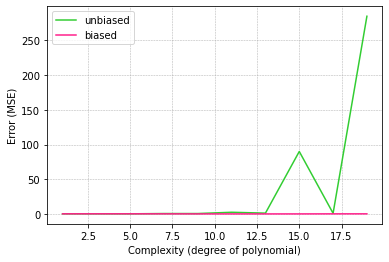

In [14]:
plt.plot(complexities, errors, label="unbiased", color=Color.GREEN.value)
plt.plot(complexities, tr_errors, label="biased", color=Color.MAGENTA.value)
plt_decorate(xlabel="Complexity (degree of polynomial)", ylabel="Error (MSE)")
plt.legend()

## Classification

In [ ]:
X_train, y_train = get_cls_X_y(50, seed=rng)
X, y = get_cls_X_y(50, seed=rng)

complexities = np.arange(1, 10, 1)
errors = []
tr_errors = []
for depth in complexities:
    model = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    y_tr_pred = model.predict(X_train)
    y_pred = model.predict(X)

    errors.append(mean_squared_error(y, y_pred))
    tr_errors.append(mean_squared_error(y_train, y_tr_pred))

In [ ]:
plt.plot(complexities, errors, label="unbiased", color=Color.GREEN.value)
plt.plot(complexities, tr_errors, label="biased", color=Color.MAGENTA.value)
plt_decorate(xlabel="Complexity (depth)", ylabel="Error (misclassification rate)")
plt.legend()

# Overfitting and complexity
The part in the above graphs where the curves diverge is called
overfitting. It is when the model was selected by following too closely the
training set. At that stage, the true error (estimated on the unbiased set)
is much worse than what appear on the training set.

It is important to note that on the x-axis, the label is "complexity". Defining
it precisely is a bit involved (see `VC dimension`) but intuitively it is a
measure of how expressive the hypothesis space is. For instance, you can
express more functions with degree-2 polynomials than with degree-1
(ie. linear) polynomials.
Similarly, you a depth-2 decision tree can express more functions than a stump
(depth-1 decision tree).

Since a complex hypothesis space is more flexible, there is more freedom to
find a good match on the training set alone. Because this is the (in)direct
objective of any training algorithm (but see `regularization` for some nuance),
it explains why overfitting appears (and usually increases to some extent)
with higher complexities.

Finally, let us note that the last comments implies that, for a fixed hypothesis
space (hence complexity), increasing the number of training samples $n$ makes it
less likely to find a hypothesis which happens to fit training set by chance.
More broadly speaking, the only reason for which we might have to reduce the
number of training samples is computing time.


> ###### Take aways
> - The error must be estimated on an independent set.
> - Overfitting (is much more likely to) appear(s) when the hypothesis space
> is too "complex".
> - The more training samples, the better.




# Reliable estimates
The error on the training set is called the `resubstitution error`. As we have
seen, this is not a reliable estimate. In the experiments above, we generated
a new dataset. This is, of course, not feasible in practical settings. Instead,
we rely on the two methods below.

## Train/test split
When the training set is large enough, one can simply split it in two, setting
some samples aside for estimation. This is known as the `train/test` method.

> TODO image

In [ ]:
# Scikit-learn comes with all the necessary tools
from sklearn.model_selection import train_test_split
X, y = get_reg_X_y(50)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.33, random_state=rng,
)
print(X_train.shape, X_test.shape)

## Cross-validation
When the dataset is small, setting aside samples might hurt the performance.
On the other hand, a too small test set might not provide a stable-enough
error estimate. In such circumstances, we may opt for `cross-validation` (CV).

Cross-validation consists in splitting the dataset in $k$ (eg. 10) folds. Each
fold is used to train a model, and the remaining samples are used as test set.
The process is repeated for each fold, and the errors are averaged.

> TODO image

Once again, scikit-learn comes with facilities for cross-validation

> ###### Technical note
> It should be noted that the estimate given by the cross-validation actually
> measure the average performance of the learning algorithm, not of the model.
> If the variance is low, the CV estimate can be used as a surrogate for the
> model's error.

